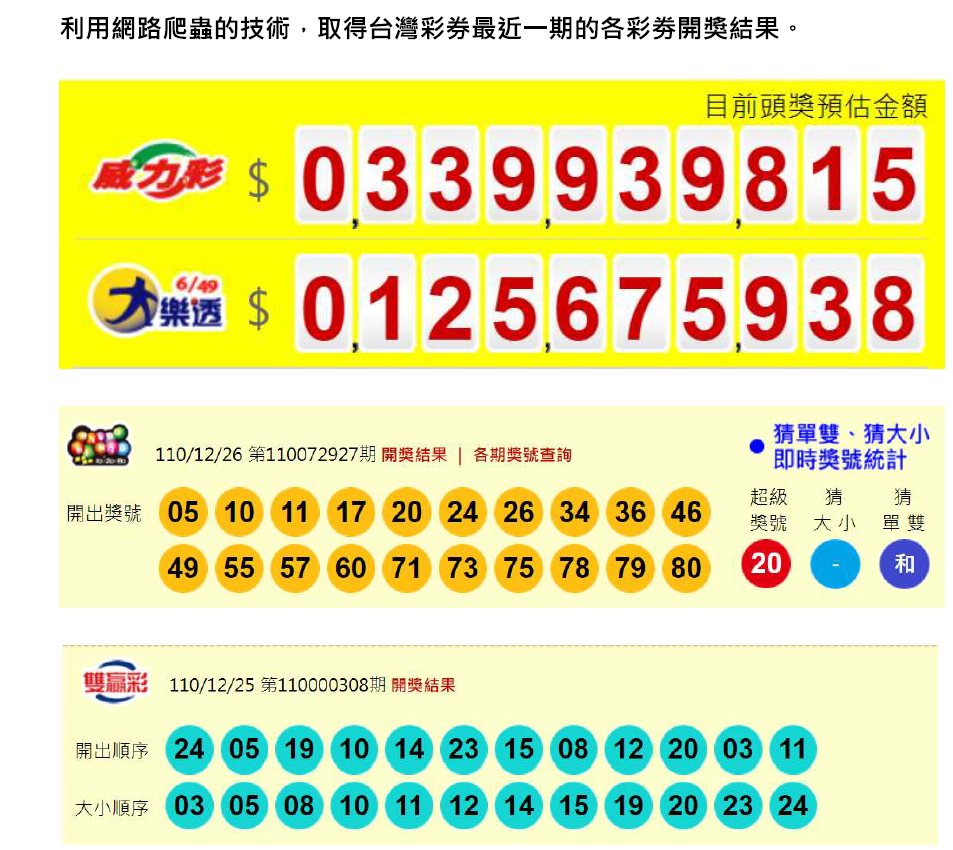

In [79]:
import requests
from bs4 import BeautifulSoup

# 讀取網頁原始碼
url = "https://www.taiwanlottery.com.tw/index_new.aspx"
html = requests.get(url)
sp = BeautifulSoup(html.text,'lxml')

# 預估金額(威力彩、大樂透): 位於 類別為 "top_dollar_tx" 的 div
def TopDollar():
    top_dollar_num = sp.find_all('div', class_="top_dollar_tx")
    #print(top_dollar)
    top_dollar_name = ['威力彩', '大樂透']
    print("目前頭獎預估金額：")
    print("-"*30)
    for tdn,td in zip(top_dollar_name,top_dollar_num):  # 顯示金額，若無數字則顯示"更新中"
        if  td.find('div', class_="top_dollar") == None:
            dollar = td.find('div', class_="top_text")
            print('{}：\t {}'.format(tdn,dollar.text))
        else:
            dollar = td.find('div', class_="top_dollar")
            print('{}：ＮＴ＄ {}'.format(tdn,int(dollar.text)))
    print("="*30)

# BINGO BINGO: 位於 類別為 "contents_box01" 的 div
def Bingo():
    datas_bingo = sp.find('div', class_="contents_box01")
    #print(datas_bingo)
    title_bingo = datas_bingo.find('span', class_="font_black15")  # 標題
    print("BINGO BINGO",end="　")
    print(title_bingo.text)
    print("-"*30)
    num_bingo = datas_bingo.find_all('div', class_="ball_tx ball_yellow")  # 開出獎號
    for i in range(0,20):
        if i == 0: print("開出獎號：",end=" ")
        if i == 10: print("　"*5,end=" ")
        if i < 19:
            print(num_bingo[i].text,end=", ")
        else:
            print(num_bingo[i].text)       
        if i == 9: print()
    num_bingo_sup = datas_bingo.find('div', class_="ball_red")   # 超級獎號
    print("超級獎號：",num_bingo_sup.text,end=" ")
    print()
    num_bingo_big = datas_bingo.find('div', class_="ball_blue_BB1")  # 猜大小
    print("　猜大小：",num_bingo_big.text,end=" ")
    print()
    num_bingo_OddEven = datas_bingo.find('div', class_="ball_blue_BB2")  # 猜單雙
    print("　猜單雙：",num_bingo_OddEven.text,end=" ")
    print()
    print("="*30)

# 雙贏彩: 位於 類別為 "contents_box06" 的 div
def Lotto1224():
    datas_LT1224 = sp.find('div', class_="contents_box06")
    #print(datas_LT1224)
    title_LT1224 = datas_LT1224.find('span', class_="font_black15")  # 標題
    print("雙贏彩",end="　")
    print(title_LT1224.text)
    print("-"*30)
    num_LT1224 = datas_LT1224.find_all('div', class_="ball_tx ball_blue")  # 開出獎號
    print("開出順序：",end=" ")
    for i in range(12):
        if i == 11: 
            print(num_LT1224[i].text)
            break
        print(num_LT1224[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(12,24):
        if i == 23: 
            print(num_LT1224[i].text)
            break
        print(num_LT1224[i].text,end=", ")
    print("="*30)

## class 為 "contents_box02" 的 div 有四塊：威力彩、38樂合彩、大樂透、49樂合彩 (皆為第一區取6號) ##
datas_M6 = sp.find_all('div', class_="contents_box02")
#print(datas_M6)

# 威力彩: 位於 類別為 "contents_box02" 的 div 的第一塊
def Superlotto638():
    datas_SLT638 = datas_M6[0]
    #print(datas_SLT638)
    title_SLT638 = datas_SLT638.find('span', class_="font_black15")  # 標題
    print("威力彩",end="　")
    print(title_SLT638.text)
    print("-"*30)
    num_SLT638 = datas_SLT638.find_all('div', class_="ball_tx ball_green")  # 開出獎號(第一區)
    print("開出順序：",end=" ")
    for i in range(0,6):
        if i == 5: 
            print(num_SLT638[i].text)
            break
        print(num_SLT638[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(6,12):
        if i == 11: 
            print(num_SLT638[i].text)
            break
        print(num_SLT638[i].text,end=", ")
    second_SLT638 = datas_SLT638.find('div', class_="ball_red") # 第二區
    print("　第二區：", second_SLT638.text,end=" ")
    print()
    print("="*30)

# 38樂合彩: 位於 類別為 "contents_box02" 的 div 的第二塊 (威力彩不計第二區)
def Superlotto38M6():
    datas_SLT38M6 = datas_M6[1]
    #print(datas_SLT638)
    title_SLT38M6 = datas_SLT38M6.find('span', class_="font_black15")  # 標題
    print("38樂合彩",end="　")
    print(title_SLT38M6.text)
    print("-"*30)
    num_SLT38M6 = datas_SLT38M6.find_all('div', class_="ball_tx ball_green")  # 開出獎號
    print("開出順序：",end=" ")
    for i in range(0,6):
        if i == 5: 
            print(num_SLT38M6[i].text)
            break
        print(num_SLT38M6[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(6,12):
        if i == 11: 
            print(num_SLT38M6[i].text)
            break
        print(num_SLT38M6[i].text,end=", ")
    print("="*30)

# 大樂透: 位於 類別為 "contents_box02" 的 div 的第三塊
def Lotto649():
    datas_LT649 = datas_M6[2]
    #print(datas_LT649)
    title_LT649 = datas_LT649.find('span', class_="font_black15")  # 標題
    print("大樂透",end="　")
    print(title_LT649.text)
    print("-"*30)
    num_LT649 = datas_LT649.find_all('div', class_="ball_tx ball_yellow")  # 開出獎號(第一區)
    print("開出順序：",end=" ")
    for i in range(0,6):
        if i == 5: 
            print(num_LT649[i].text)
            break
        print(num_LT649[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(6,12):
        if i == 11: 
            print(num_LT649[i].text)
            break
        print(num_LT649[i].text,end=", ")
    second_LT649 = datas_LT649.find('div', class_="ball_red") # 第二區
    print("　第二區：", second_LT649.text,end=" ")
    print()
    print("="*30)

# 49樂合彩: 位於 類別為 "contents_box02" 的 div 的第四塊 (大樂透不計第二區)
def Lotto49M6():
    datas_LT49M6 = datas_M6[3]
    #print(datas_LT649)
    title_LT49M6 = datas_LT49M6.find('span', class_="font_black15")  # 標題
    print("49樂合彩",end="　")
    print(title_LT49M6.text)
    print("-"*30)
    num_LT49M6 = datas_LT49M6.find_all('div', class_="ball_tx ball_yellow")  # 開出獎號
    print("開出順序：",end=" ")
    for i in range(0,6):
        if i == 5: 
            print(num_LT49M6[i].text)
            break
        print(num_LT49M6[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(6,12):
        if i == 11: 
            print(num_LT49M6[i].text)
            break
        print(num_LT49M6[i].text,end=", ")
    print("="*30)

## class 為 "contents_box03" 的 div 有兩塊： 今彩539、39樂合彩 (皆為取5號) ##
datas_M5 = sp.find_all('div', class_="contents_box03")

# 今彩539: 位於 類別為 "contents_box03" 的 div
def DailyCash():
    datas_DCash = datas_M5[0]
    #print(datas_DCash)
    title_DCash = datas_DCash.find('span', class_="font_black15")  # 標題
    print("今彩539",end="　")
    print(title_DCash.text)
    print("-"*30)
    num_DCash = datas_DCash.find_all('div', class_="ball_tx ball_lemon")  # 開出獎號
    print("開出順序：",end=" ")
    for i in range(0,5):
        if i == 4: 
            print(num_DCash[i].text)
            break
        print(num_DCash[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(5,10):
        if i == 9: 
            print(num_DCash[i].text)
            break
        print(num_DCash[i].text,end=", ")
    print("="*30)

# 39樂合彩: 位於 類別為 "contents_box03" 的 div
def Daily39M5():
    datas_D39M5 = datas_M5[1]
    #print(datas_DCash)
    title_D39M5 = datas_D39M5.find('span', class_="font_black15")  # 標題
    print("39樂合彩",end="　")
    print(title_D39M5.text)
    print("-"*30)
    num_D39M5 = datas_D39M5.find_all('div', class_="ball_tx ball_lemon")  # 開出獎號
    print("開出順序：",end=" ")
    for i in range(0,5):
        if i == 4: 
            print(num_D39M5[i].text)
            break
        print(num_D39M5[i].text,end=", ")
    print("大小順序：",end=" ")
    for i in range(5,10):
        if i == 9: 
            print(num_D39M5[i].text)
            break
        print(num_D39M5[i].text,end=", ")
    print("="*30)

datas_star = sp.find_all('div', class_="contents_box04")
# 3星彩: 位於 類別為 "contents_box04" 的 div
def D3():
    datas_3D = datas_star[0]
    title_3D = datas_3D.find('span', class_="font_black15")  # 標題
    print("3星彩",end="　")
    print(title_3D.text)
    print("-"*30)
    num_3D = datas_3D.find_all('div', class_="ball_tx ball_purple")  # 開出獎號
    print("中獎號碼：",end=" ")
    for i in range(0,3):
        if i == 2: 
            print(num_3D[i].text)
            break
        print(num_3D[i].text,end=", ")
    print("="*30)

# 4星彩: 位於 類別為 "contents_box04" 的 div
def D4():
    datas_4D = datas_star[1]
    title_4D = datas_4D.find('span', class_="font_black15")  # 標題
    print("4星彩",end="　")
    print(title_4D.text)
    print("-"*30)
    num_4D = datas_4D.find_all('div', class_="ball_tx ball_purple")  # 開出獎號
    print("中獎號碼：",end=" ")
    for i in range(0,4):
        if i == 3: 
            print(num_4D[i].text)
            break
        print(num_4D[i].text,end=", ")
    print("="*30)

# 列印結果主程式
print("台灣彩券　最新開獎結果")
print(url)
print("="*30)
TopDollar()
Bingo()
Lotto1224()
Superlotto638()
Superlotto38M6()
Lotto649()
Lotto49M6()
DailyCash()
Daily39M5()
D3()
D4()
print("未滿18歲者 不得購買或兌領彩券")


台灣彩券　最新開獎結果
https://www.taiwanlottery.com.tw/index_new.aspx
目前頭獎預估金額：
------------------------------
威力彩：ＮＴ＄ 482067557
大樂透：ＮＴ＄ 134443816
BINGO BINGO　111/3/25 第111017038期 
------------------------------
開出獎號： 01 , 02 , 03 , 07 , 14 , 17 , 20 , 21 , 23 , 27 , 
　　　　　 30 , 33 , 41 , 43 , 45 , 46 , 64 , 67 , 69 , 71 
超級獎號： 41 
　猜大小： － 
　猜單雙： 單 
雙贏彩　111/3/25 第111000072期 
------------------------------
開出順序： 12 , 18 , 01 , 10 , 19 , 11 , 23 , 08 , 13 , 07 , 04 , 15 
大小順序： 01 , 04 , 07 , 08 , 10 , 11 , 12 , 13 , 15 , 18 , 19 , 23 
威力彩　111/3/24 第111000024期 
------------------------------
開出順序： 29 , 34 , 12 , 20 , 08 , 15 
大小順序： 08 , 12 , 15 , 20 , 29 , 34 
　第二區： 04  
38樂合彩　111/3/24 第111000024期 
------------------------------
開出順序： 29 , 34 , 12 , 20 , 08 , 15 
大小順序： 08 , 12 , 15 , 20 , 29 , 34 
大樂透　111/3/25 第111000034期 
------------------------------
開出順序： 45 , 47 , 49 , 14 , 22 , 17 
大小順序： 14 , 17 , 22 , 45 , 47 , 49 
　第二區： 26  
49樂合彩　111/3/25 第111000034期 
------------------------------
開出順序： 4